In [1]:
import pandas as pd

# Define the path to your 'ed' folder (adjust the path accordingly)
ed_path = 'mimic-iv-ed-demo-2.2 2/ed/'  # Update to your actual folder path

# Load each file into a DataFrame
diagnosis_df = pd.read_csv(ed_path + 'diagnosis.csv.gz')
edstays_df = pd.read_csv(ed_path + 'edstays.csv.gz')
medrecon_df = pd.read_csv(ed_path + 'medrecon.csv.gz')
pyxis_df = pd.read_csv(ed_path + 'pyxis.csv.gz')
triage_df = pd.read_csv(ed_path + 'triage.csv.gz')
vitalsign_df = pd.read_csv(ed_path + 'vitalsign.csv.gz')



In [3]:
diagnosis_df

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10025463,35470228,1,431,9,INTRACEREBRAL HEMORRHAGE
1,10027602,36678718,1,431,9,INTRACEREBRAL HEMORRHAGE
2,10009049,31628990,1,486,9,"PNEUMONIA,ORGANISM UNSPECIFIED"
3,10014078,38676365,1,3453,9,GRAND MAL STATUS
4,10007928,39661025,1,5780,9,HEMATEMESIS
...,...,...,...,...,...,...
540,10002428,33978784,1,78009,9,SEMICOMA/STUPOR
541,10002428,32007337,1,78791,9,DIARRHEA
542,10002428,34982171,2,E8889,9,UNSPECIFIED FALL
543,10002428,38216551,1,H5713,10,"Ocular pain, bilateral"


In [5]:
# List of ICD codes related to sepsis (from the earlier discussion)
sepsis_icd_codes = [
    'A41', 'R65.2',  # General sepsis and severe sepsis
    'A41.9', 'A40.9', 'A41.0', 'A41.1', 'A41.2', 'A41.3', 'A41.4', 'A41.5', 'A41.8',  # Sepsis-related codes
    'R65.20', 'R65.21'  # Severe Sepsis
]

# Filter the diagnosis dataframe for sepsis-related ICD codes
sepsis_df = diagnosis_df[diagnosis_df['icd_code'].isin(sepsis_icd_codes)]

# Check the first few rows of the filtered sepsis data
print(sepsis_df.head())

# Optionally, count the number of unique patients diagnosed with sepsis
sepsis_patients = sepsis_df['subject_id'].unique()
print(f"Number of unique patients diagnosed with sepsis: {len(sepsis_patients)}")


Empty DataFrame
Columns: [subject_id, stay_id, seq_num, icd_code, icd_version, icd_title]
Index: []
Number of unique patients diagnosed with sepsis: 0


In [7]:
# List of keywords related to sepsis
sepsis_keywords = ['sepsis', 'septic', 'septicemia', 'severe sepsis']

# Filter rows where the icd_title contains any of the sepsis-related keywords
sepsis_title_df = diagnosis_df[diagnosis_df['icd_title'].str.contains('|'.join(sepsis_keywords), case=False, na=False)]

# Check the first few rows of the filtered data
print(sepsis_title_df.head())

# Optionally, count the number of unique patients diagnosed with sepsis based on icd_title
sepsis_title_patients = sepsis_title_df['subject_id'].unique()
print(f"Number of unique patients diagnosed with sepsis based on title: {len(sepsis_title_patients)}")

    subject_id   stay_id  seq_num icd_code  icd_version       icd_title
11    10014729  37887480        1     0389            9  SEPTICEMIA NOS
12    10014729  37887480        4    78552            9    SEPTIC SHOCK
13    10014729  37887480        2    99592            9  SEVERE SEPSIS 
83    10020944  39738665        1     0389            9  SEPTICEMIA NOS
84    10020944  39738665        2    99591            9         SEPSIS 
Number of unique patients diagnosed with sepsis based on title: 4


In [12]:
sepsis_title_df

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
11,10014729,37887480,1,0389,9,SEPTICEMIA NOS
12,10014729,37887480,4,78552,9,SEPTIC SHOCK
13,10014729,37887480,2,99592,9,SEVERE SEPSIS
83,10020944,39738665,1,0389,9,SEPTICEMIA NOS
84,10020944,39738665,2,99591,9,SEPSIS
248,10039708,34918384,1,A419,10,"Sepsis, unspecified organism"
366,10019003,31254712,1,A419,10,"Sepsis, unspecified organism"


In [18]:
# List of stay_ids for sepsis patients
sepsis_stay_ids = [10014729, 10020944, 10039708, 10019003]

# Filter the diagnosis dataframe for the identified sepsis patients
sepsis_patients = diagnosis_df[diagnosis_df['subject_id'].isin(sepsis_stay_ids)]

# Display the number of unique sepsis patients
num_sepsis_patients = sepsis_patients['subject_id'].nunique()
print(f"Number of unique sepsis patients: {num_sepsis_patients}")

Number of unique sepsis patients: 4


/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_40926/303469650.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=sepsis_ed, palette='Set2')


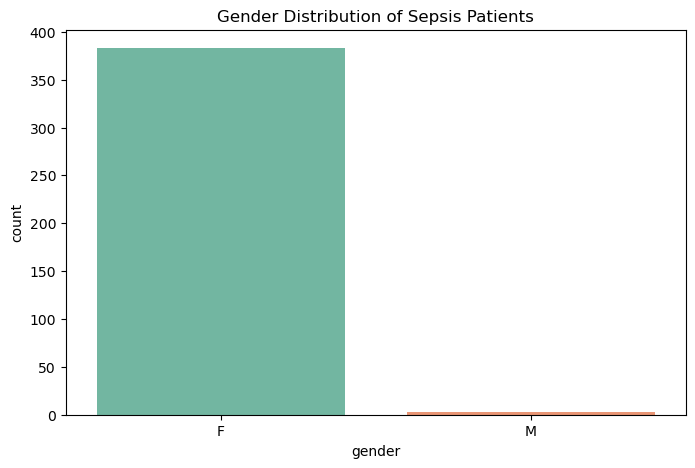

In [26]:
# Merge with edstays to get demographics
sepsis_ed = sepsis_patients.merge(edstays_df[['subject_id','stay_id', 'gender']], on='subject_id')

# Demographic distribution: age and gender
import seaborn as sns
import matplotlib.pyplot as plt

# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=sepsis_ed, palette='Set2')
plt.title('Gender Distribution of Sepsis Patients')
plt.show()

In [22]:
edstays_df

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10014729,23300884.0,37887480,2125-03-19 12:36:00,2125-03-19 16:59:47,F,WHITE - OTHER EUROPEAN,WALK IN,ADMITTED
1,10018328,26706939.0,34176810,2154-02-05 17:09:00,2154-02-05 22:54:00,F,WHITE,AMBULANCE,ADMITTED
2,10018328,NaN,32103106,2154-08-03 15:31:00,2154-08-03 22:29:00,F,WHITE,AMBULANCE,HOME
3,10020640,27984218.0,38797992,2153-02-12 21:59:00,2153-02-13 01:38:00,F,WHITE,AMBULANCE,ADMITTED
4,10015272,27993466.0,33473053,2137-06-12 16:54:00,2137-06-12 18:37:22,F,WHITE,AMBULANCE,ADMITTED
...,...,...,...,...,...,...,...,...,...
217,10009049,22995465.0,31628990,2174-05-26 04:20:00,2174-05-26 09:18:00,M,WHITE,AMBULANCE,ADMITTED
218,10004457,28723315.0,32405286,2141-08-12 12:08:00,2141-08-12 17:20:00,M,WHITE,WALK IN,ADMITTED
219,10004720,22081550.0,34391979,2186-11-12 16:09:00,2186-11-12 19:55:00,M,WHITE,UNKNOWN,ADMITTED
220,10004720,NaN,34161260,2183-12-02 18:06:00,2183-12-03 00:30:00,M,WHITE,WALK IN,HOME


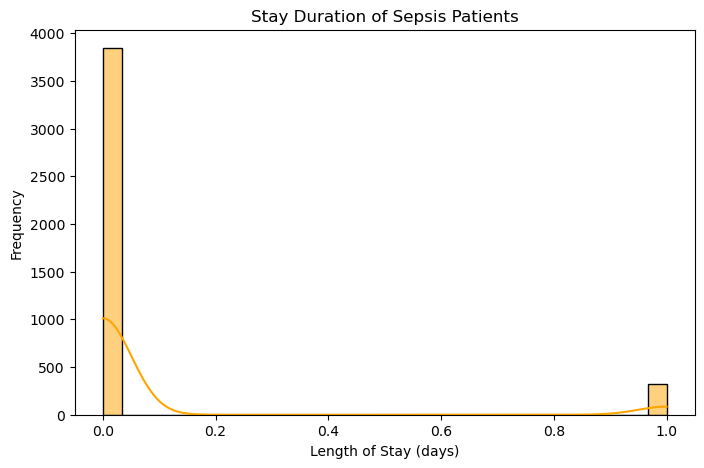

In [30]:
# Calculate length of stay
sepsis_stays = sepsis_ed.merge(edstays_df[['subject_id', 'stay_id', 'intime', 'outtime']], on='subject_id')

# Convert times to datetime format
sepsis_stays['intime'] = pd.to_datetime(sepsis_stays['intime'])
sepsis_stays['outtime'] = pd.to_datetime(sepsis_stays['outtime'])

# Calculate the duration of stay
sepsis_stays['stay_duration'] = (sepsis_stays['outtime'] - sepsis_stays['intime']).dt.days

# Plot distribution of stay durations
plt.figure(figsize=(8, 5))
sns.histplot(sepsis_stays['stay_duration'], kde=True, bins=30, color='orange')
plt.title('Stay Duration of Sepsis Patients')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_40926/1482051767.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_comorbidities.index, y=top_comorbidities.values, palette='coolwarm')


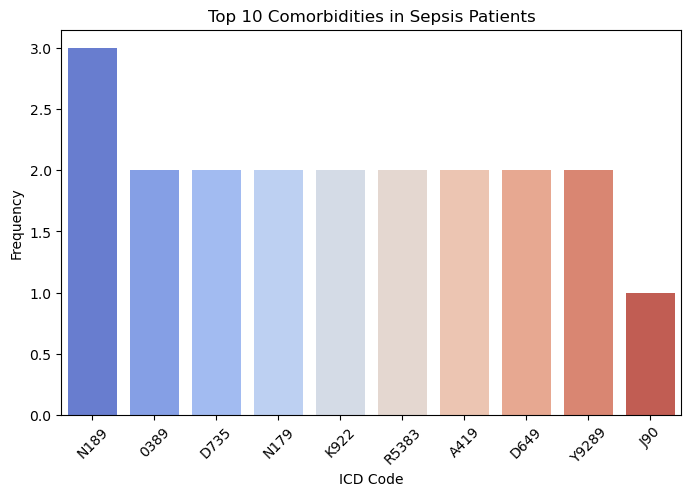

In [32]:
# Get all diagnoses for sepsis patients
sepsis_comorbidities = diagnosis_df[diagnosis_df['subject_id'].isin(sepsis_patients['subject_id'])]

# Plot the top comorbidities
top_comorbidities = sepsis_comorbidities['icd_code'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_comorbidities.index, y=top_comorbidities.values, palette='coolwarm')
plt.title('Top 10 Comorbidities in Sepsis Patients')
plt.xlabel('ICD Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


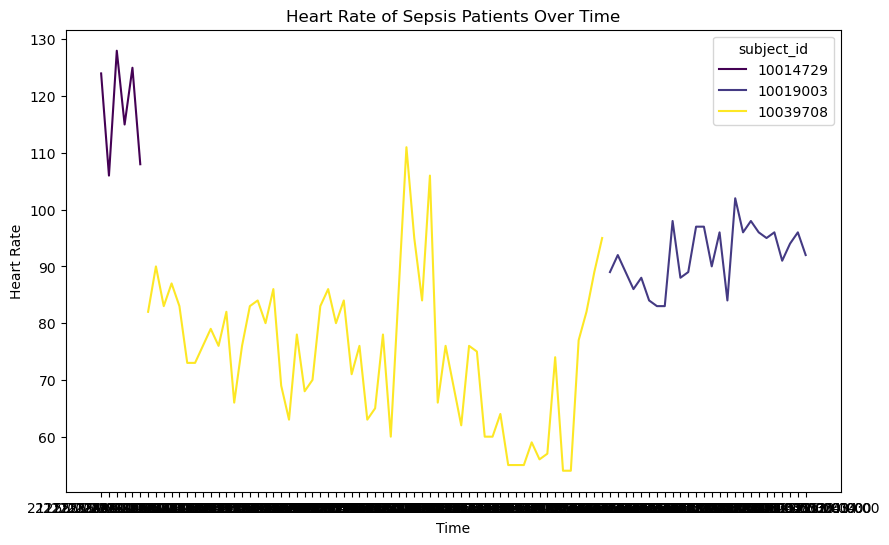

In [40]:
# Merge sepsis data with vital signs
sepsis_vitals = vitalsign_df[vitalsign_df['subject_id'].isin(sepsis_patients['subject_id'])]

# Plot vital signs for sepsis patients (e.g., heart rate)
plt.figure(figsize=(10, 6))
sns.lineplot(data=sepsis_vitals, x='charttime', y='heartrate', hue='subject_id', palette='viridis')
plt.title('Heart Rate of Sepsis Patients Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.show()


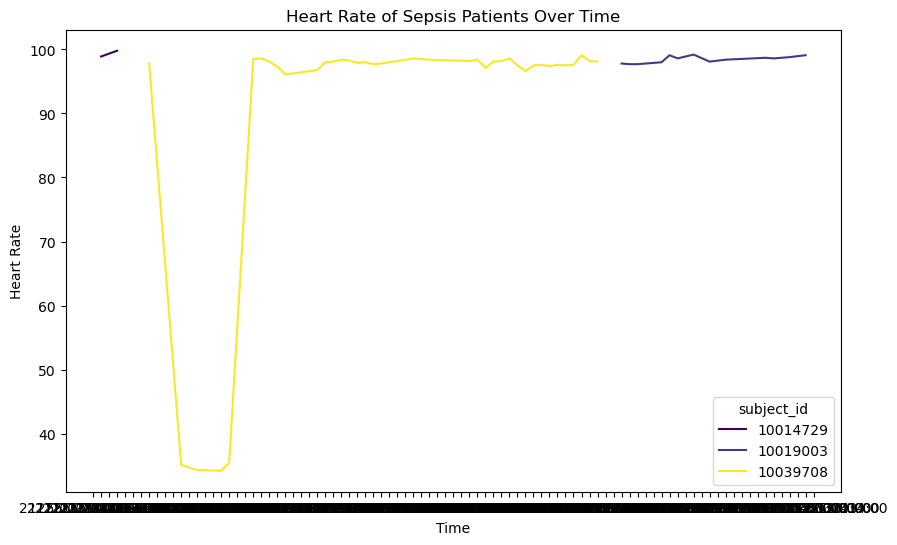

In [42]:
# Plot vital signs for sepsis patients (e.g., heart rate)
plt.figure(figsize=(10, 6))
sns.lineplot(data=sepsis_vitals, x='charttime', y='temperature', hue='subject_id', palette='viridis')
plt.title('Heart Rate of Sepsis Patients Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.show()


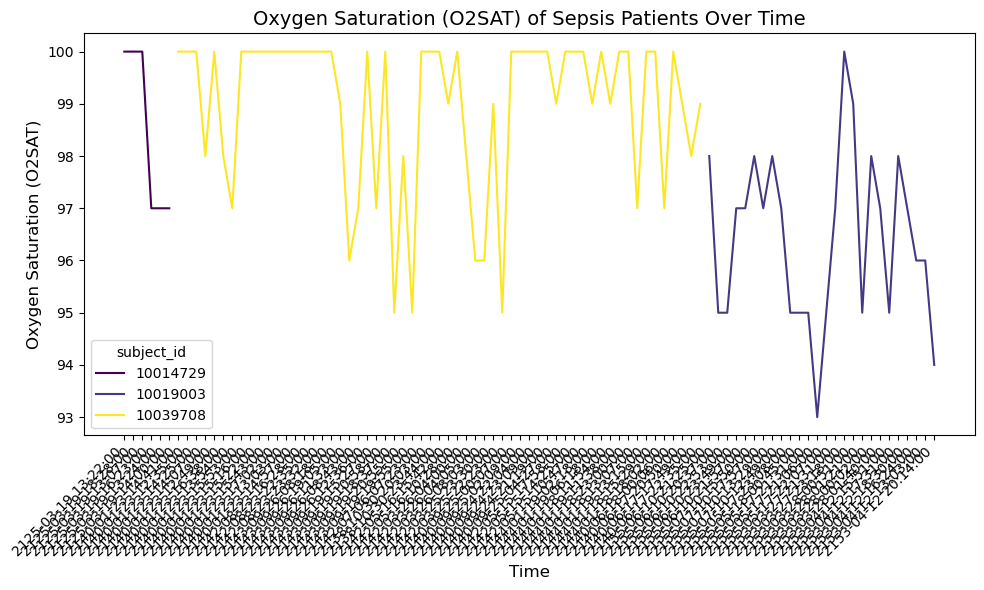

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10, 6))

# Line plot for sepsis patients' o2sat over time
sns.lineplot(data=sepsis_vitals, x='charttime', y='o2sat', hue='subject_id', palette='viridis')

# Set the title and labels
plt.title('Oxygen Saturation (O2SAT) of Sepsis Patients Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Oxygen Saturation (O2SAT)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent label clipping
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
vitalsign_df

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,10014729,37887480,2125-03-19 13:22:00,NaN,124.0,24.0,100.0,93.0,65.0,NaN,NaN
1,10014729,37887480,2125-03-19 18:28:00,98.9,106.0,18.0,100.0,115.0,70.0,Sinus Tachycardia,5
2,10014729,37887480,2125-03-19 13:07:00,NaN,128.0,18.0,100.0,132.0,96.0,Sinus Tachycardia,NaN
3,10014729,37887480,2125-03-19 16:23:00,99.8,115.0,22.0,97.0,114.0,45.0,Sinus Tachycardia,0
4,10014729,37887480,2125-03-19 13:24:00,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1033,10002428,32822973,2156-04-30 18:47:00,NaN,100.0,30.0,98.0,100.0,55.0,NaN,0
1034,10002428,32822973,2156-04-30 20:14:00,NaN,90.0,26.0,NaN,80.0,41.0,NaN,0
1035,10002428,32822973,2156-04-30 19:47:00,NaN,96.0,29.0,NaN,104.0,56.0,NaN,0
1036,10002428,33227245,2155-12-04 21:31:00,97.4,82.0,16.0,100.0,148.0,85.0,NaN,NaN


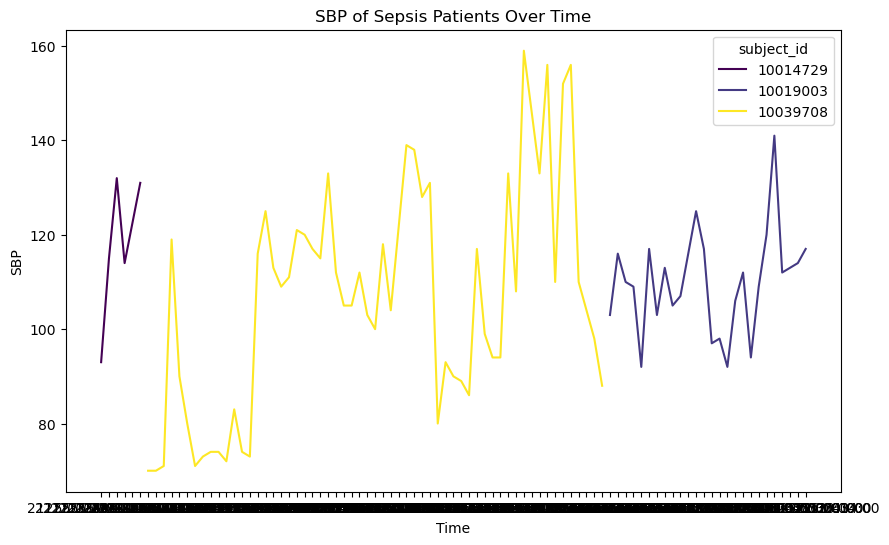

In [48]:
# Plot vital signs for sepsis patients (e.g., heart rate)
plt.figure(figsize=(10, 6))
sns.lineplot(data=sepsis_vitals, x='charttime', y='sbp', hue='subject_id', palette='viridis')
plt.title('SBP of Sepsis Patients Over Time')
plt.xlabel('Time')
plt.ylabel('SBP')
plt.show()
